In [92]:
!pip install pandas
!pip install numpy
!pip install pandas-profiling==2.7.1
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import os

!pip install seaborn
import seaborn as sns

from pandas.api.types import CategoricalDtype
#Test_value_label = pd.read_csv('Test_valueing set labels.csv')
#Test_value_value = pd.read_csv('Test_valueing set values.csv')
Test_value = pd.read_csv('Test set values.csv')
#Test_value = pd.merge(Test_value_value,Test_value_label, how='inner',left_on='id',right_on='id', left_index=False)

In [93]:
# Function to set up # of category for features
test_cat = 8
def max_cat(col):
    if len(Test_value[col].value_counts()) > (test_cat):
        top_value = Test_value[col].value_counts()[:(test_cat)].index.tolist()
        Test_value.loc[-Test_value[col].isin(top_value),col]='Others'
                
    return Test_value
        

In [94]:
Test_value.shape

(14850, 40)

In [95]:
Test_value.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [96]:
Test_value.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [97]:
# Check for Duplicate values
Test_value.duplicated().sum()

0

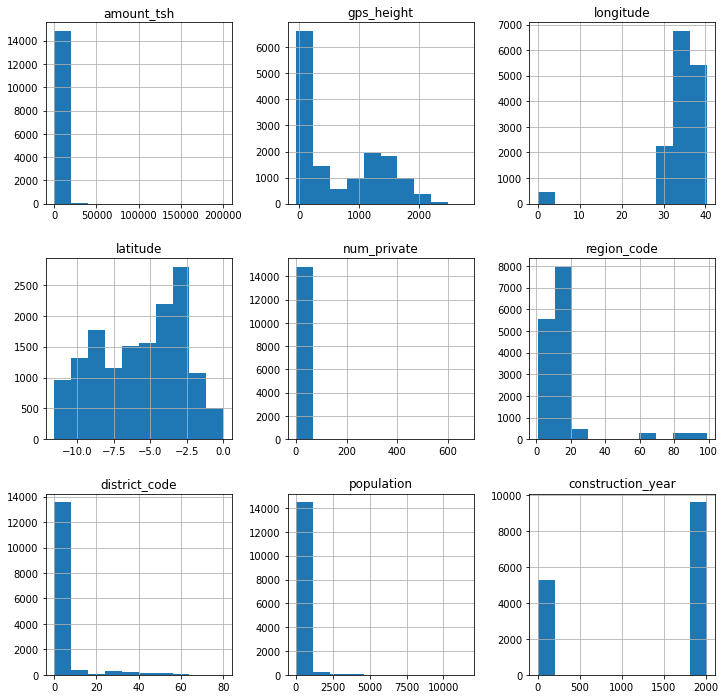

In [98]:
#Check the histogram for numeric features
Test_value.iloc[:,1:].hist(figsize=(12,12))
plt.show()

###  Clean All Numeric Features
In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

#### Cleanning - amount_tsh
- Outlier

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count     14850.000000
mean        322.826983
std        2510.968644
min           0.000000
25%           0.000000
50%           0.000000
75%          25.000000
max      200000.000000
Name: amount_tsh, dtype: float64

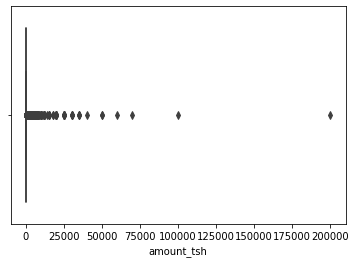

In [99]:
sns.boxplot(Test_value['amount_tsh'])
Test_value['amount_tsh'].describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    14850.000000
mean        15.189609
std         25.353870
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max         62.500000
Name: amount_tsh, dtype: float64

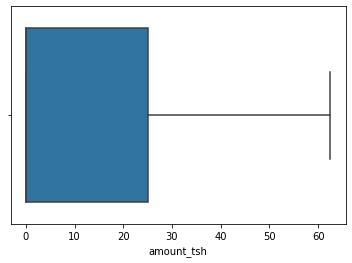

In [100]:
# Inter-Quartile Range (IQR) proximity rule
percentile25 = Test_value['amount_tsh'].quantile(0.25)
percentile75 = Test_value['amount_tsh'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# apply the Capping on Outliers
Test_value['amount_tsh'] = np.where(Test_value['amount_tsh']>upper_limit,upper_limit,
                      np.where(Test_value['amount_tsh']<lower_limit,lower_limit,Test_value['amount_tsh']))

sns.boxplot(Test_value['amount_tsh'])

Test_value['amount_tsh'].describe()

In [101]:
print(Test_value['amount_tsh'].skew()) #skewness

1.1920322332470166


#### Cleanning - 'gps_height'
After checking, nothing to be dealed with

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    14850.000000
mean       655.147609
std        691.261185
min        -57.000000
25%          0.000000
50%        344.000000
75%       1308.000000
max       2777.000000
Name: gps_height, dtype: float64

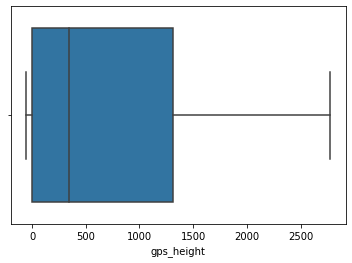

In [102]:
sns.boxplot(Test_value['gps_height'])
Test_value['gps_height'].describe()

In [105]:
print(Test_value['gps_height'].skew()) #skewness

0.497093589880279


#### Cleanning - longitude | latitude
Reference: https://worldpopulationreview.com/country-locations/where-is-tanzania    
latitude :  00°59' - 11°45′ -> should be negative due South Lat  -> -0.59  ~ - 11.45
longitude:  29°10' -  40°29′ East

In [106]:
Test_value[['longitude','latitude']].describe()

,longitude,latitude
count,14850.000000,1.485000e+04
mean,34.061605,-5.684724e+00
std,6.593034,2.940803e+00
min,0.000000,-1.156459e+01
25%,33.069455,-8.443970e+00
50%,34.901215,-5.049750e+00
75%,37.196594,-3.320594e+00
max,40.325016,-2.000000e-08


In [107]:
long_lat_error =Test_value[((Test_value['longitude'] < 29.10)  | (Test_value['longitude'] > 40.29)) | ((Test_value['latitude'] < -11.45)  | (Test_value['latitude'] > -0.59))] 


In [108]:
# Correct long_lat_error using mean of corrected  long & lat
long_mean = Test_value[(Test_value['longitude'] >= 29.10)  | (Test_value['longitude'] <= 40.29)]['longitude'].mean()
lat_mean = Test_value[(Test_value['latitude'] >= -11.45)  | (Test_value['latitude'] <= -0.59)]['latitude'].mean()
#long_mean: 34.077426692028794
#lat_mean: -5.706032659626431
                  

In [109]:
Test_value['longitude'] = np.where(((Test_value.longitude <29.10 ) | (Test_value.longitude > 40.29)),long_mean,Test_value.longitude)
Test_value['latitude'] = np.where(((Test_value.latitude < -11.45) | (Test_value.latitude > -0.59)),lat_mean,Test_value.latitude)

In [110]:
# Test long_lat_error -> should be zero instance 
long_lat_error =Test_value[((Test_value['longitude'] < 29.10)  | (Test_value['longitude'] > 40.29)) | ((Test_value['latitude'] < -11.45)  | (Test_value['latitude'] > -0.59))] 
long_lat_error # zero instance
Test_value[['longitude','latitude']].describe()

,longitude,latitude
count,14850.000000,14850.000000
mean,35.107725,-5.853016
std,2.579501,2.754407
min,29.612776,-11.448590
25%,33.326568,-8.426434
50%,34.898943,-5.460249
75%,37.195307,-3.393220
max,40.278993,-0.998752


#### Cleanning - 'num_private'
-Outlier

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    14850.000000
mean         0.415084
std          8.167910
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        669.000000
Name: num_private, dtype: float64

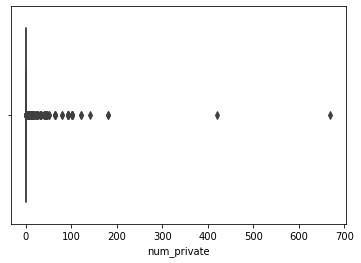

In [111]:
sns.boxplot(Test_value['num_private'])
Test_value['num_private'].describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    14850.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_private, dtype: float64

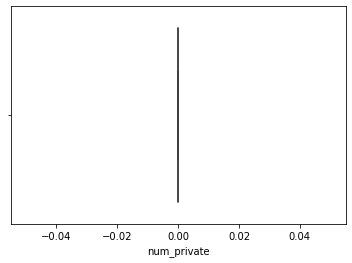

In [112]:
# Inter-Quartile Range (IQR) proximity rule
percentile25 = Test_value['num_private'].quantile(0.25)
percentile75 = Test_value['num_private'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# apply the Capping on Outliers
Test_value['num_private'] = np.where(Test_value['num_private']>upper_limit,upper_limit,
                      np.where(Test_value['num_private']<lower_limit,lower_limit,Test_value['num_private']))

sns.boxplot(Test_value['num_private'])

Test_value['num_private'].describe()

#### Cleanning - region_code
Reference : https://www.worldatlas.com/maps/tanzania
Standerdize region code with region
Reference: https://www.citypopulation.de/en/tanzania/admin/

In [113]:
df_region_error = Test_value.pivot_table('id','region','region_code',aggfunc='count').fillna(0).astype(int)


In [114]:
df = Test_value.pivot_table('id','region','region_code',aggfunc='count').fillna(0).astype(int)
df.to_csv('region_error.csv')
Test_value.loc[Test_value['region_code'] == 24,'region_code'] = 2
Test_value.loc[(Test_value['region_code'] == 18 )| (Test_value['region_code'] == 80),'region_code' ] = 8
Test_value.loc[(Test_value['region_code'] == 90 )| (Test_value['region_code'] == 99),'region_code' ] = 9
Test_value.loc[(Test_value['region_code'] == 17) & (Test_value['region'] == 'Mwanza'),'region_code'] = 19
Test_value.loc[(Test_value['region_code'] == 60 )| (Test_value['region_code'] == 40),'region_code'] = 6
Test_value.loc[(Test_value['region_code'] == 5)  & (Test_value['region'] == 'Tanga') ,'region_code' ] = 4
Test_value.loc[(Test_value['region_code'] == 11) & (Test_value['region'] == 'Shinyanga'),'region_code'] = 17
Test_value.loc[(Test_value['region_code'] == 14 )& (Test_value['region'] == 'Shinyanga'),'region_code'] = 17

df = Test_value.pivot_table('id','region','region_code',aggfunc='count').fillna(0).astype(int)
df
                                    

region_code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21
region,,,,,,,,,,,,,,,,,,,,
Arusha,0,761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dar es Salaam,0,0,0,0,0,0,215,0,0,0,0,0,0,0,0,0,0,0,0,0
Dodoma,578,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Iringa,0,0,0,0,0,0,0,0,0,0,1305,0,0,0,0,0,0,0,0,0
Kagera,0,0,0,0,0,0,0,858,0,0,0,0,0,0,0,0,0,0,0,0
Kigoma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,717,0,0,0,0
Kilimanjaro,0,0,1115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lindi,0,0,0,0,0,0,0,374,0,0,0,0,0,0,0,0,0,0,0,0
Manyara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,389


#### Cleanning - district_code
code with 0 -> no sense

In [115]:
Test_value['district_code'].value_counts()

1     3096
2     2756
3     2523
4     2254
5     1072
6     1034
7      823
30     261
8      239
33     189
53     176
43     148
13     105
63      69
23      67
62      18
60      13
0        4
67       2
80       1
Name: district_code, dtype: int64

In [116]:
df_district_error = Test_value.pivot_table('id','region','district_code',aggfunc='count').fillna(0).astype(int)
# district_code with 0 -> error   

In [117]:
Test_value.loc[Test_value['district_code'] == 0,'district_code'] = 1
df_district = Test_value.pivot_table('id','region','district_code',aggfunc='count').fillna(0).astype(int) 
df_district

district_code,1,2,3,4,5,6,7,8,13,23,30,33,43,53,60,62,63,67,80
region,,,,,,,,,,,,,,,,,,,
Arusha,37,254,34,0,44,81,235,0,0,0,76,0,0,0,0,0,0,0,0
Dar es Salaam,28,136,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dodoma,223,0,99,92,109,55,0,0,0,0,0,0,0,0,0,0,0,0,0
Iringa,186,129,165,617,123,0,85,0,0,0,0,0,0,0,0,0,0,0,0
Kagera,196,135,103,98,0,24,65,52,0,0,185,0,0,0,0,0,0,0,0
Kigoma,227,299,170,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kilimanjaro,157,123,229,311,155,25,115,0,0,0,0,0,0,0,0,0,0,0,0
Lindi,0,1,75,0,0,0,0,0,105,67,0,0,51,57,0,18,0,0,0
Manyara,114,70,88,59,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Cleanning - 'population'

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    14850.000000
mean       184.114209
std        469.499332
min          0.000000
25%          0.000000
50%         20.000000
75%        220.000000
max      11469.000000
Name: population, dtype: float64

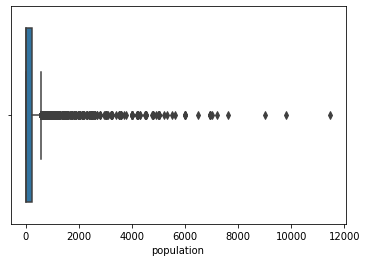

In [118]:
sns.boxplot(Test_value['population'])
Test_value['population'].describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    14850.000000
mean       129.081751
std        178.869536
min          0.000000
25%          0.000000
50%         20.000000
75%        220.000000
max        550.000000
Name: population, dtype: float64

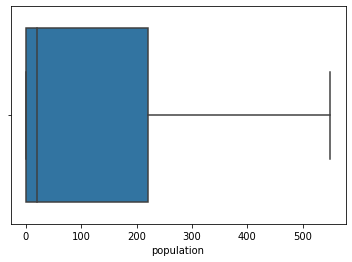

In [119]:
# Inter-Quartile Range (IQR) proximity rule
percentile25 = Test_value['population'].quantile(0.25)
percentile75 = Test_value['population'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# apply the Capping on Outliers
Test_value['population'] = np.where(Test_value['population']>upper_limit,upper_limit,
                      np.where(Test_value['population']<lower_limit,lower_limit,Test_value['population']))

sns.boxplot(Test_value['population'])
Test_value['population'].describe()

In [120]:
print(Test_value['population'].skew()) #skewness

1.259408790692717


#### Cleanning - 'construction_year'
- Missing Value
- Outlier

Construct_year = pd.read_csv('construct_years.csv')
Construct_year.shape
Construct_year['construction_year'].head()

In [121]:
Test_value['construction_year'].head()

0    2012
1    2000
2    2010
3    1987
4    2000
Name: construction_year, dtype: int64

In [124]:
Test_value['construction_year'].describe()

count    14850.000000
mean      1289.708350
std        955.241087
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [125]:
Construct_year['construction_year'].describe()

count    59400.000000
mean      1984.259057
std         20.054689
min       1960.000000
25%       1960.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

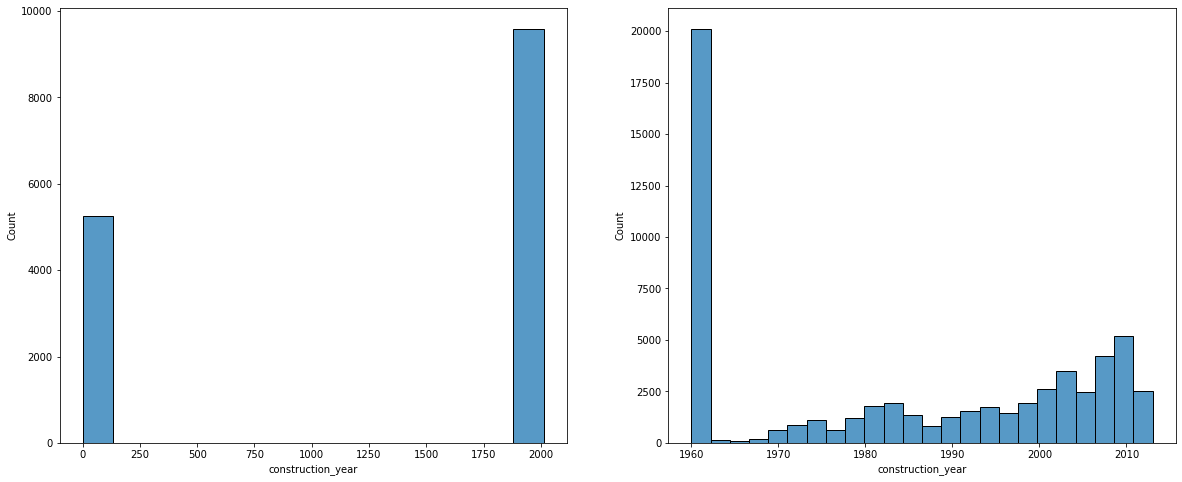

In [126]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(Test_value['construction_year'], ax=ax1)
sns.histplot(Construct_year['construction_year'],ax=ax2)
plt.show()


In [36]:
Test_value['construction_year'].loc[Test_value['construction_year'] == 0] #20709
Construct_year['construction_year'].loc[Construct_year['construction_year'] == 1960] #20036

4        1960
6        1960
7        1960
8        1960
9        1960
         ... 
59379    1960
59392    1960
59393    1960
59397    1960
59398    1960
Name: construction_year, Length: 20036, dtype: int64

In [37]:
Test_value['construction_year'] = Construct_year['construction_year']
Test_value['construction_year'].describe()

count    14850.000000
mean      1984.241616
std         20.089233
min       1960.000000
25%       1960.000000
50%       1985.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

###  Clean All Category Features

#### Cleanning - funder 
- Missing Value

In [127]:
Test_value['funder'].value_counts()

Government Of Tanzania    2215
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
                          ... 
Oxfarm Gb                    1
Mount Meru Flowers           1
Idara Ya Afya                1
Italy                        1
Livin                        1
Name: funder, Length: 980, dtype: int64

In [128]:
Test_value['funder']=Test_value['funder'].str.replace(r'\W+', ' ', regex=True)
Test_value['funder']=Test_value['funder'].str.replace('0', 'Unknown ')
Test_value['funder'].fillna(Test_value['funder'].mode()[0],inplace=True)

In [129]:
Test_value['funder'].value_counts()

Government Of Tanzania    3084
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
                          ... 
Lengai Makoo                 1
Bi Kidawa                    1
Kulwa                        1
Waingereza                   1
Livin                        1
Name: funder, Length: 976, dtype: int64

#### Cleanning - installer 
- Missing Value

In [130]:
Test_value['installer'].value_counts() # with punctation & 0 & singler letter

DWE           4349
Government     457
RWE            292
Commu          287
DANIDA         255
              ... 
Commun           1
QUIKWIN          1
SDG              1
MoWI             1
LIVI             1
Name: installer, Length: 1091, dtype: int64

In [131]:
Test_value['installer']=Test_value['installer'].str.replace(r'\W+', ' ', regex=True)
Test_value['installer']=Test_value['installer'].str.replace('0', 'Unknown ')
Test_value['installer']=Test_value['installer'].apply(lambda a: "Other" if len(str(a)) == 1 else a)
Test_value['installer'].fillna(Test_value['installer'].mode()[0],inplace= True)

In [132]:
Test_value['installer'].value_counts() 

DWE                5226
Government          457
RWE                 292
Commu               287
DANIDA              255
                   ... 
Not kno               1
IADO                  1
Buguba                1
TWESA Community       1
LIVI                  1
Name: installer, Length: 1059, dtype: int64

In [133]:
#### Cleanning - wpt_name
Test_value['wpt_name'].value_counts() #3563 - none

none                877
Shuleni             435
Zahanati            204
Msikitini           112
Sokoni               68
                   ... 
Kwa Gadau             1
Bubinza B             1
Nguvu Kazi A          1
Kwa Everigist         1
Kwa Mzee Chagala      1
Name: wpt_name, Length: 10840, dtype: int64

#### Cleanning - basin
Reference : https://www.researchgate.net/figure/Map-of-the-nine-River-Basin-Offices-in-Tanzania_fig1_312373453

In [134]:
Test_value['basin'].value_counts()  # with " / ";  should be removed

Lake Victoria              2623
Pangani                    2203
Rufiji                     2011
Internal                   1857
Lake Tanganyika            1620
Wami / Ruvu                1590
Lake Nyasa                 1247
Ruvuma / Southern Coast    1094
Lake Rukwa                  605
Name: basin, dtype: int64

In [135]:
test = Test_value.loc[Test_value['basin'] == 'Wami / Ruvu','basin']
test = test.str.replace('/','')

test2 = Test_value.loc[Test_value['basin'] == 'Ruvuma / Southern Coast','basin']
test2 = test2.str.replace('/','and')


In [136]:
#Test_value['basin'] = Test_value['basin'] .astype(str) 

Test_value.loc[Test_value['basin'] == 'Wami / Ruvu','basin'] = test
Test_value.loc[Test_value['basin'] == 'Ruvuma / Southern Coast','basin'] = test2


In [137]:
Test_value['basin'].value_counts()

Lake Victoria                2623
Pangani                      2203
Rufiji                       2011
Internal                     1857
Lake Tanganyika              1620
Wami  Ruvu                   1590
Lake Nyasa                   1247
Ruvuma and Southern Coast    1094
Lake Rukwa                    605
Name: basin, dtype: int64

#### Cleanning - subvillage 
- missing value
- inconsistent value including (M, 1, I K)
The mode of a set of data values is the value that appears most often. It is the value at which the data is most likely to be sampled.

In [138]:
Test_value['subvillage'].value_counts()[:60]

Shuleni                 140
Majengo                 129
Madukani                121
Kati                     94
Sokoni                   62
Mtakuja                  60
M                        56
Songambele               47
Mbuyuni                  46
Muungano                 43
Amani                    38
Mlimani                  38
Kanisani                 35
Miembeni                 34
Bondeni                  31
Msikitini                30
Kibaoni                  29
Senta                    27
Kichangani               26
1                        25
Nyerere                  24
Mtaa Wa Kitunda Kati     24
Mwenge                   23
Mjini                    23
Kisiwani                 22
Mjimwema                 21
Mtaa Wa Kivule           21
Mkwajuni                 21
Msumbiji                 21
Msufini                  20
Chang'Ombe               20
Barabarani               19
Misufini                 19
Azimio                   18
Mbugani                  18
Zahanati            

In [139]:
# to deal with missing value
Test_value['subvillage'].fillna(Test_value['subvillage'].mode()[0], inplace=True)

In [140]:
# to deal with inconsistent value including (M, 1, I K)
Test_value.loc[Test_value['subvillage'] == 'M', 'subvillage'] = 'Other'
Test_value.loc[Test_value["subvillage"] == '1', 'subvillage'] = "Other"
Test_value.loc[Test_value['subvillage'] == 'I', 'subvillage'] = 'Other'
Test_value.loc[Test_value['subvillage'] == 'K', 'subvillage'] = 'Other'
Test_value['subvillage'].value_counts()[:60]

Shuleni                 239
Majengo                 129
Madukani                121
Other                   112
Kati                     94
Sokoni                   62
Mtakuja                  60
Songambele               47
Mbuyuni                  46
Muungano                 43
Mlimani                  38
Amani                    38
Kanisani                 35
Miembeni                 34
Bondeni                  31
Msikitini                30
Kibaoni                  29
Senta                    27
Kichangani               26
Nyerere                  24
Mtaa Wa Kitunda Kati     24
Mwenge                   23
Mjini                    23
Kisiwani                 22
Msumbiji                 21
Mkwajuni                 21
Mtaa Wa Kivule           21
Mjimwema                 21
Msufini                  20
Chang'Ombe               20
Misufini                 19
Barabarani               19
Azimio                   18
Mbugani                  18
Zahanati                 18
Mapinduzi           

In [141]:
#### Cleanning - region
Test_value['region'].value_counts()

Shinyanga        1311
Iringa           1305
Mbeya            1119
Kilimanjaro      1115
Morogoro         1032
Kagera            858
Mwanza            795
Arusha            761
Kigoma            717
Pwani             696
Ruvuma            666
Tanga             639
Dodoma            578
Tabora            507
Mara              482
Singida           443
Rukwa             434
Mtwara            414
Manyara           389
Lindi             374
Dar es Salaam     215
Name: region, dtype: int64

#### Cleanning - lga 
no errors
Cosider Rural vs Urban - to be visulization

In [142]:
Test_value["lga"].value_counts() #125

Njombe          625
Moshi Rural     315
Bariadi         308
Rungwe          275
Kasulu          275
               ... 
Songea Urban     23
Tanga            22
Arusha Urban     19
Lindi Urban       3
Nyamagana         1
Name: lga, Length: 125, dtype: int64

#### Cleanning - ward
There 2092 uniqu value - consider use function max_cat to pick top value
The Ward Profiles provide demographic information on population by age, households and dwelling types, families, language group, household tenure and period of construction; immigration, mobility, ethnic origin and visible minorities; education and labour force; income and shelter cost. 

In [143]:
Test_value["ward"].value_counts() #2092
#max_cat('ward')

Igosi        79
Imalinyi     66
Siha Kati    65
Mdandu       61
Kitunda      57
             ..
Manyondwe     1
Lizaboni      1
Masasi        1
Mtombozi      1
Idifu         1
Name: ward, Length: 1959, dtype: int64

#### Cleanning - Public_meeting
Replace Public_meeting missing values by unknown

Text(0.5, 1.0, 'Public Meeting')

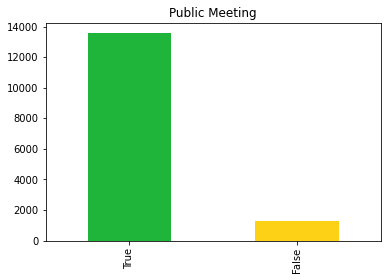

In [144]:
Test_value['public_meeting'].fillna(Test_value['public_meeting'].mode()[0], inplace=True)
tanzania_flag_colors = ['#1eb53a', '#fcd116', '#00a3dd', 'black']
Test_value.public_meeting.value_counts().plot(kind='bar', color=tanzania_flag_colors);
plt.title("Public Meeting")

In [145]:
#### Cleanning - scheme_management
Test_value['scheme_management'].value_counts()

VWC                 9124
WUG                 1290
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64

In [146]:
Test_value['scheme_management'].fillna(Test_value['scheme_management'].mode()[0],inplace=True)

In [147]:
#### Cleanning - scheme_name
Test_value['scheme_name'].value_counts()

K                      176
Borehole               158
None                   150
DANIDA                 104
Chalinze wate           96
                      ... 
Iseke water supply       1
Dina                     1
Water supplying          1
Mazi                     1
Mbwasa water supply      1
Name: scheme_name, Length: 1789, dtype: int64

In [148]:
Test_value['scheme_name'] = Test_value['scheme_name'].apply(lambda a: "Other" if len(str(a)) == 1 else a)
Test_value['scheme_name'].fillna(Test_value['scheme_name'].mode()[0],inplace=True)

In [149]:
Test_value['scheme_name'].value_counts()

Other                    7602
Borehole                  158
None                      150
DANIDA                    104
Chalinze wate              96
                         ... 
BL Kyongwa                  1
Chen                        1
Olmolog water project       1
Kilimi Dam                  1
Mbwasa water supply         1
Name: scheme_name, Length: 1770, dtype: int64

In [150]:
#### Cleanning - permit
Test_value['permit'].value_counts()

True     9754
False    4359
Name: permit, dtype: int64

In [151]:
Test_value['permit'].fillna(Test_value['permit'].mode()[0], inplace=True)

In [152]:
Test_value['permit'].describe()

count     14850
unique        2
top        True
freq      10491
Name: permit, dtype: object

In [153]:
#### Cleanning - extraction_type
Test_value['extraction_type'].value_counts()

gravity              6483
nira/tanira          2051
other                1672
submersible          1218
swn 80                918
mono                  763
india mark ii         629
afridev               438
ksb                   375
other - rope pump     121
other - swn 81         55
india mark iii         37
windmill               35
cemo                   18
other - play pump      16
walimi                 12
climax                  9
Name: extraction_type, dtype: int64

In [154]:
Test_value['extraction_type'] = Test_value['extraction_type'].str.replace("/"," ")
Test_value['extraction_type'] = Test_value['extraction_type'].str.replace("other - ","")
Test_value['extraction_type'].value_counts()

gravity           6483
nira tanira       2051
other             1672
submersible       1218
swn 80             918
mono               763
india mark ii      629
afridev            438
ksb                375
rope pump          121
swn 81              55
india mark iii      37
windmill            35
cemo                18
play pump           16
walimi              12
climax               9
Name: extraction_type, dtype: int64

In [155]:
#### Cleanning - extraction_type_group
Test_value['extraction_type_group'].value_counts()

gravity            6483
nira/tanira        2051
other              1672
submersible        1593
swn 80              918
mono                763
india mark ii       629
afridev             438
rope pump           121
other handpump       83
india mark iii       37
wind-powered         35
other motorpump      27
Name: extraction_type_group, dtype: int64

In [156]:
Test_value['extraction_type_group'] = Test_value['extraction_type_group'].str.replace("/"," ")
Test_value['extraction_type_group'] = Test_value['extraction_type_group'].str.replace("other ","")
Test_value['extraction_type_group'] = Test_value['extraction_type_group'].str.replace("-"," ")
Test_value['extraction_type_group'].value_counts()

gravity           6483
nira tanira       2051
other             1672
submersible       1593
swn 80             918
mono               763
india mark ii      629
afridev            438
rope pump          121
handpump            83
india mark iii      37
wind powered        35
motorpump           27
Name: extraction_type_group, dtype: int64

In [157]:
#### Cleanning - extraction_class
Test_value['extraction_type_class'].value_counts()

gravity         6483
handpump        4156
other           1672
submersible     1593
motorpump        790
rope pump        121
wind-powered      35
Name: extraction_type_class, dtype: int64

In [158]:
Test_value['extraction_type_class'] = Test_value['extraction_type_class'].str.replace(" ","")
Test_value['extraction_type_class'] = Test_value['extraction_type_class'].str.replace("-","")
Test_value['extraction_type_class'].value_counts()

gravity        6483
handpump       4156
other          1672
submersible    1593
motorpump       790
ropepump        121
windpowered      35
Name: extraction_type_class, dtype: int64

In [159]:
#### Cleanning - management
Test_value['management'].value_counts()

vwc                 10117
wug                  1593
water board           755
wua                   583
private operator      533
parastatal            461
other                 239
water authority       219
company               174
unknown               122
other - school         27
trust                  27
Name: management, dtype: int64

In [160]:
Test_value['management'] = Test_value['management'].str.replace("other - ","")
Test_value['management'].value_counts()

vwc                 10117
wug                  1593
water board           755
wua                   583
private operator      533
parastatal            461
other                 239
water authority       219
company               174
unknown               122
school                 27
trust                  27
Name: management, dtype: int64

In [161]:
#### Cleanning - management_group
Test_value['management_group'].value_counts()
Test_value['management_group'] = Test_value['management_group'].str.replace("-"," ") 

In [162]:
Test_value['management_group'].value_counts()

user group    13048
commercial      953
parastatal      461
other           266
unknown         122
Name: management_group, dtype: int64

In [163]:
#### Cleanning - payment
Test_value['payment'].value_counts()

never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay annually              928
pay when scheme fails     928
other                     260
Name: payment, dtype: int64

In [164]:
#### Cleanning - payment_type
Test_value['payment_type'].value_counts()

never pay     6364
per bucket    2281
monthly       2097
unknown       1992
annually       928
on failure     928
other          260
Name: payment_type, dtype: int64

In [165]:
#### Cleanning - watet_qualityf
Test_value['water_quality'].value_counts()

soft                  12687
salty                  1226
unknown                 469
milky                   201
coloured                133
salty abandoned          84
fluoride                 44
fluoride abandoned        6
Name: water_quality, dtype: int64

In [166]:
#### Cleanning - quality_group | quality
Test_value['quality_group'].value_counts()

good        12687
salty        1310
unknown       469
milky         201
colored       133
fluoride       50
Name: quality_group, dtype: int64

In [167]:
#### Cleanning - quantity_group | quantity
Test_value['quantity_group'].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity_group, dtype: int64

In [168]:
Test_value['quantity'].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity, dtype: int64

#### Cleanning - source | source type | source_calss

In [171]:
Test_value[['region','population']]
df_pop = Test_value.pivot_table('id','region','population',aggfunc='sum').fillna(0).astype(int) 
df_pop['sum'] = df_pop.sum(axis = 1)
df_pop['sum']

region
Arusha           29321448
Dar es Salaam     7928656
Dodoma           21254096
Iringa           47655434
Kagera           31567464
Kigoma           27098753
Kilimanjaro      41913702
Lindi            13922659
Manyara          14814616
Mara             17644613
Mbeya            41785037
Morogoro         38133234
Mtwara           15548751
Mwanza           29975408
Pwani            24829063
Rukwa            15959470
Ruvuma           24486728
Shinyanga        48471312
Singida          16931728
Tabora           19853706
Tanga            22759420
Name: sum, dtype: int64

#### Checking dataset after cleaning

In [172]:
Test_value.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

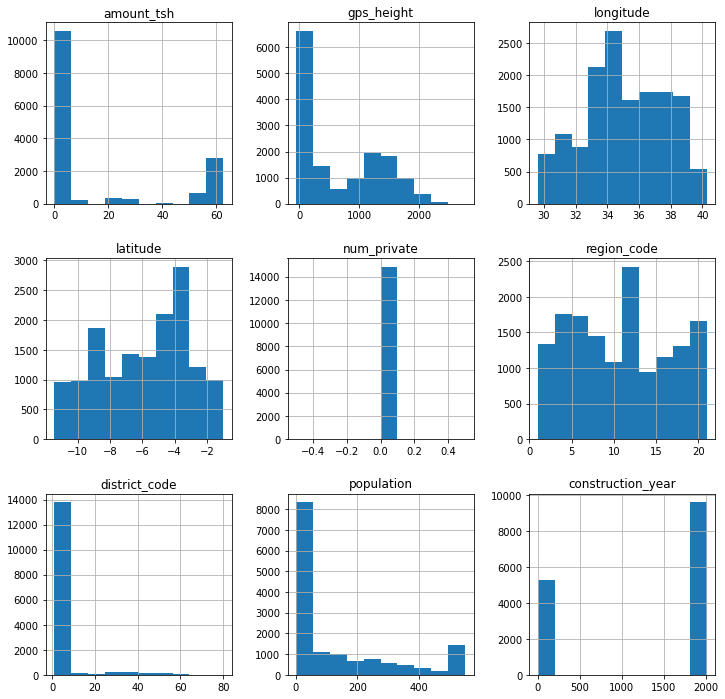

In [173]:
Test_value.iloc[:,1:].hist(figsize=(12,12))
plt.show()

In [174]:
Test_value.shape

(14850, 40)

In [175]:
Test_value.to_csv('Test_value_clean.csv')